<a href="https://colab.research.google.com/github/ttderessa/Temesgen-Deressa/blob/main/ANN_Auto_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values after imputation: 0
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8190 - loss: 0.5111
Epoch 1: val_loss improved from inf to 0.30688, saving model to models/best_model.keras
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8190 - loss: 0.5110 - val_accuracy: 0.9191 - val_loss: 0.3069 - learning_rate: 0.0010
Epoch 2/30
2432/2438 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9181 - loss: 0.3087
Epoch 2: val_loss improved from 0.30688 to 0.28125, saving model to models/best_model.keras
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9181 - loss: 0.3086 - val_accuracy: 0.9191 - val_loss: 0.2812 - learning_rate: 0.0010
Epoch 3/30
2425/2438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9201 - loss: 0.2766
Epoch 3: val_loss improved from 0.28125 to 0.27315, saving model to models/best_model.keras
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9201 - loss: 0.2766 - val_accuracy: 0.9191 - val_loss: 0.2731 - learning_rate: 0.0010
Epoch 4/30
2416/2438 ━━━━━━━━━━━━━━━━━━━━ 0s 

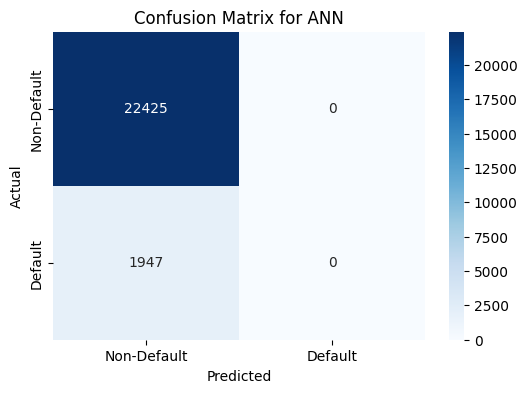


Classification Report for ANN:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22425
           1       0.00      0.00      0.00      1947

    accuracy                           0.92     24372
   macro avg       0.46      0.50      0.48     24372
weighted avg       0.85      0.92      0.88     24372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


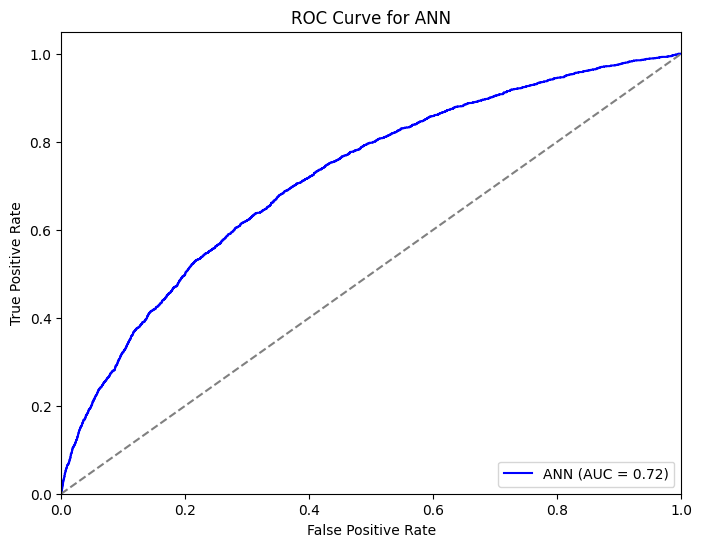

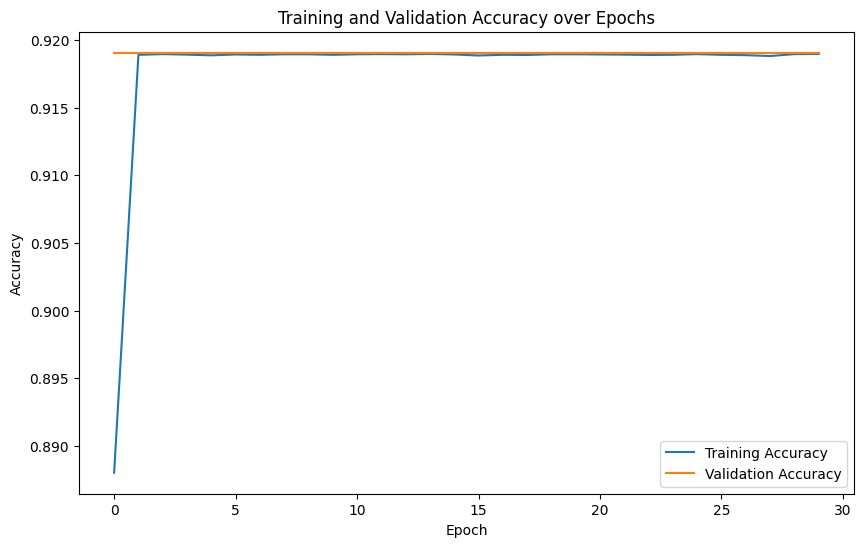

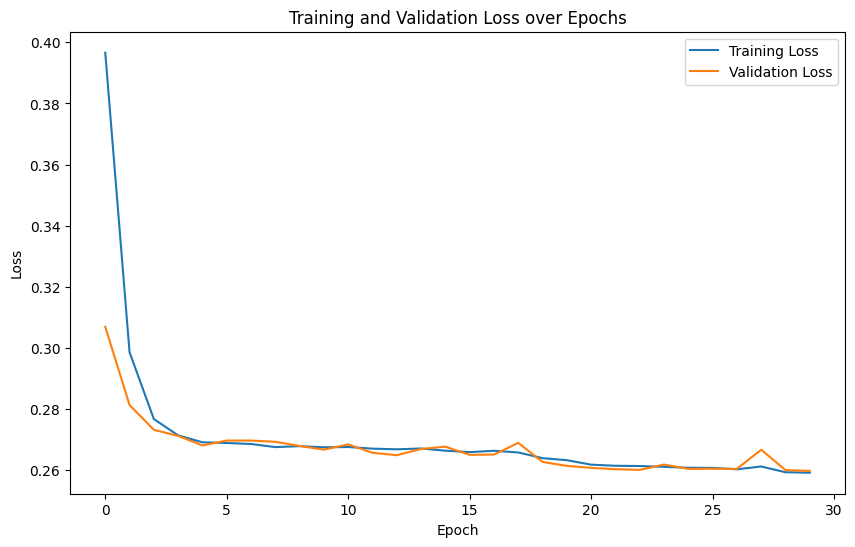

In [ ]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np

# Scikit-learn libraries for data preprocessing, model building, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow/Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Imputation library for missing data
from sklearn.impute import IterativeImputer

# Loading and preprocessing the dataset

# Load the dataset (example file name 'AutoCredit.csv')
df = pd.read_csv('/content/AutoCredit.csv', low_memory=False, on_bad_lines='skip')  # Replace with your file path

# Separate features (X) and target (y)
X = df.drop('Default', axis=1)  # Dropping the target column for features
y = df['Default']  # Target variable

# Data Cleaning and Preprocessing Functions

def optimize_memory_usage(df):
    """
    Function to optimize memory usage by downcasting numerical types and converting categorical columns to numerical codes.
    """
    for col in df.select_dtypes(include=['float']):
        df[col] = pd.to_numeric(df[col], downcast='float', errors='coerce')
    for col in df.select_dtypes(include=['int']):
        df[col] = pd.to_numeric(df[col], downcast='integer', errors='coerce')
    for col in df.select_dtypes(include=['object']):
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

def clean_data(df):
    """
    Function to clean data by replacing 'x' and other invalid entries.
    """
    df = df.replace('x', '', regex=True)
    return df

def encode_categorical_columns(df):
    """
    Function to encode categorical columns using Label Encoding.
    """
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        try:
            df[col] = le.fit_transform(df[col])
        except:
            df[col] = df[col].astype('category').cat.codes
    return df

def drop_and_impute(df):
    """
    Function to drop columns with all NaN values and apply iterative imputation for missing data.
    """
    df = df.dropna(axis=1, how='all')  # Drop columns with all NaN values
    imputer = IterativeImputer()  # Iterative imputation for missing values
    imputed_array = imputer.fit_transform(df)
    imputed_df = pd.DataFrame(imputed_array, columns=df.columns)
    missing_values = imputed_df.isna().sum().sum()  # Checking for any remaining missing values
    print(f"Missing values after imputation: {missing_values}")
    return imputed_df

# Preprocess the data using defined functions
X = clean_data(X)  # Clean the data
X = optimize_memory_usage(X)  # Optimize memory usage
X = encode_categorical_columns(X)  # Encode categorical variables
X = drop_and_impute(X)  # Handle missing data by dropping NaN columns and imputing remaining values

# Preprocessing pipeline for data transformation

# Separate numeric and categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])  # Standardize numerical features
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])  # One-hot encode categorical variables

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
                  ('cat', categorical_transformer, categorical_features)]
)

# Apply preprocessing transformations to the data
X_processed = preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Building the Artificial Neural Network (ANN) Model

# Define the ANN model architecture with Batch Normalization, Dropout, and L2 regularization
ann_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),  # Batch normalization to improve training
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Create directory for saving the best model
model_dir = 'models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)  # Create directory if it doesn't exist

# Define the checkpoint path inside the 'models' directory
checkpoint_path = os.path.join(model_dir, 'best_model.keras')

# Callbacks to monitor training: EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
checkpoint = ModelCheckpoint(checkpoint_path, save_best_only=True, monitor='val_loss', mode='min', verbose=1)  # Save best model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

# Train the model
history = ann_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2,
                        callbacks=[early_stopping, checkpoint, reduce_lr], verbose=1)

# Check if the model was saved properly
if os.path.exists(checkpoint_path):
    print(f"Best model saved at: {checkpoint_path}")
else:
    print(f"Model not saved at {checkpoint_path}. Please check your directory permissions.")

# Load the best model after training
ann_model.load_weights(checkpoint_path)

# Predicting on the test set
y_pred_prob = ann_model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluation Metrics

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.title('Confusion Matrix for ANN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("\nClassification Report for ANN:\n")
print(classification_report(y_test, y_pred))

# ROC Curve for model performance
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ANN (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ANN')
plt.legend(loc='lower right')
plt.show()

# Plotting training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()
